In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from toolkit import LightCurve
import h5py
import numpy as np

archive = h5py.File('archive.hdf5', 'r')

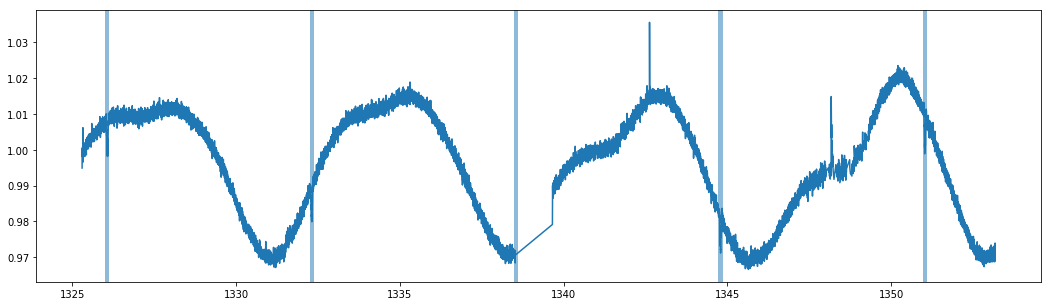

In [9]:
from scipy.ndimage import median_filter

entry = archive['01/00235037761']
times, fluxes = entry[:]
fluxes /= np.median(fluxes)

fig, ax = plt.subplots( figsize=(18, 5))
ax.plot(times, fluxes)

t0 = entry.attrs['Epoc']
period = entry.attrs['Period']
duration = entry.attrs['Duration']

ax.axvspan(t0 - duration/24, t0 + duration/24, alpha=0.5)
ax.axvspan(t0 - duration/24 + period, t0 + duration/24 + period, alpha=0.5)
ax.axvspan(t0 - duration/24 + 2*period, t0 + duration/24 + 2*period, alpha=0.5)
ax.axvspan(t0 - duration/24 + 3*period, t0 + duration/24 + 3*period, alpha=0.5)
ax.axvspan(t0 - duration/24 + 4*period, t0 + duration/24 + 4*period, alpha=0.5)

In [19]:
t0

1326.068952

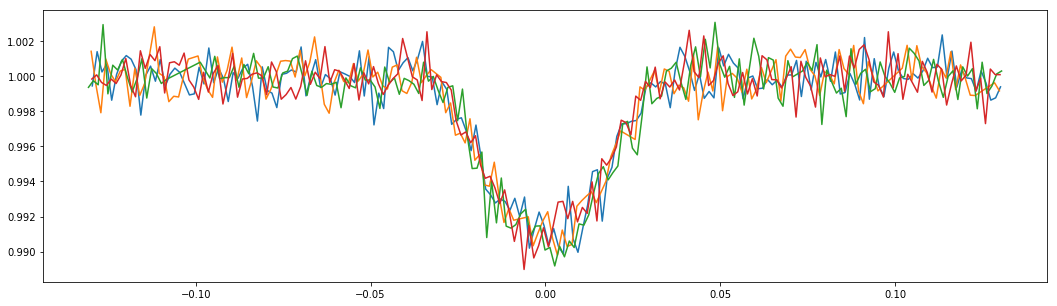

In [37]:
fig, ax = plt.subplots(figsize=(18, 5))
for i in [0, 1, 3, 4]:
    midtransit = t0 + i*period
    transit = ((midtransit - 2*duration/24 < times) & (midtransit + 2*duration/24 > times))
    transit_oot = transit & np.logical_not(np.abs(times - midtransit) < duration/24/2)

    poly = np.polyval(np.polyfit(times[transit_oot] - times[transit].mean(), 
                                 fluxes[transit_oot], 2), 
                      times[transit] - times[transit].mean())

    ax.plot(times[transit] - midtransit, fluxes[transit] / poly)